# Generating feature stacks
Oclrf uses feature stacks for pixel classification. Feature stacks are lists of images of the same size (2D or 3D). You can generate them yourself using any library. However, to get the best performance out, it is recommended to use [pyclesperanto](https://github.com/clEsperanto/pyclesperanto_prototype) because also the prediction uses it. Thus, by using it for feature stack generation and prediction, there is no need for converting or transferring image data. Furthermore, oclrfc brings a utility function for generating feature stacks. It takes an image and a feature specification string as input to produce a feature stack.

Let's start with loading an example image and making a convenience function for visualization:

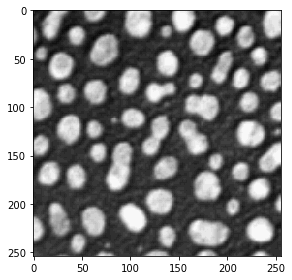

In [1]:
import numpy as np
from skimage.io import imread, imshow
image = imread('blobs.tif')
imshow(image)

In [2]:
def visualize(feature_stack):
    if len(feature_stack) == 0:
        return
    
    # show feature images
    import matplotlib.pyplot as plt
    width = 3
    height = int(len(feature_stack) / 3)
    if height * width < len(feature_stack):
        height = height + 1    
    
    fig, axes = plt.subplots(height, width, figsize=(10,10))

    # reshape(image.shape) is the opposite of ravel() here. We just need it for visualization.
    for i, f in enumerate(feature_stack):
        if height > 1:
            axes[int(i / 3)][i % 3].imshow(f, cmap=plt.cm.gray)
        else:
            axes[i].imshow(f, cmap=plt.cm.gray)

    w = len(feature_stack) % width
    if w > 0:
        w = width - w
        while (w > 0):
            if height > 1:
                axes[-1][width - w].set_visible(False)
            else:
                axes[width - w].set_visible(False)
            w = w - 1

            
    plt.show()
        

## Feature stacks
A feature stack is a list of 2D or 3D images, typically derived from an original image. If you don't specify any feature specfication, a stack will be generated with the original image, a blurred version and an edge image:

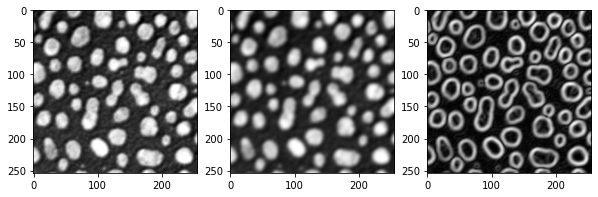

In [3]:
import oclrfc

feature_stack = oclrfc.generate_feature_stack(image)

visualize(feature_stack)

There are also some pre-defined Feature sets:

PredefinedFeatureSet.custom
generated features:  []
PredefinedFeatureSet.small_quick
generated features:  ['original', 'gaussian_blur=1.0', 'sobel_of_gaussian_blur=1.0']


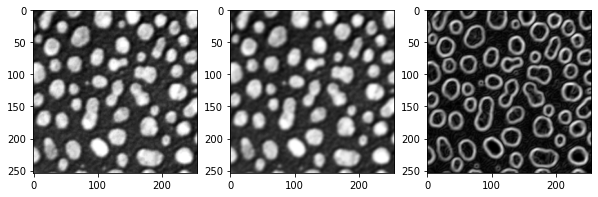

PredefinedFeatureSet.medium_quick
generated features:  ['gaussian_blur=5.0', 'sobel_of_gaussian_blur=5.0']


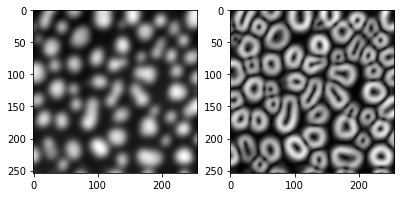

PredefinedFeatureSet.large_quick
generated features:  ['gaussian_blur=25.0', 'sobel_of_gaussian_blur=25.0']


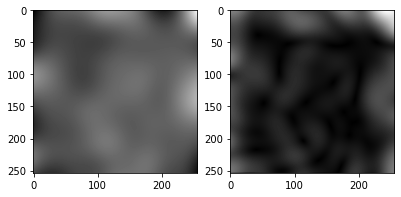

PredefinedFeatureSet.small_dog_log
generated features:  ['original', 'gaussian_blur=1.0', 'difference_of_gaussian=1.0', 'laplace_box_of_gaussian_blur=1.0']


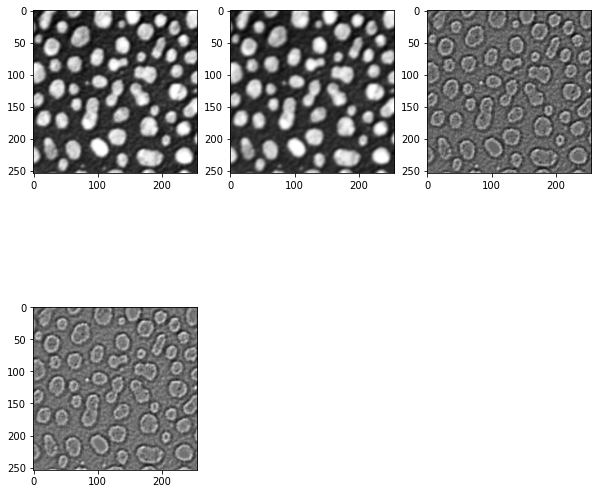

PredefinedFeatureSet.medium_dog_log
generated features:  ['gaussian_blur=5.0', 'difference_of_gaussian=5.0', 'laplace_box_of_gaussian_blur=5.0']


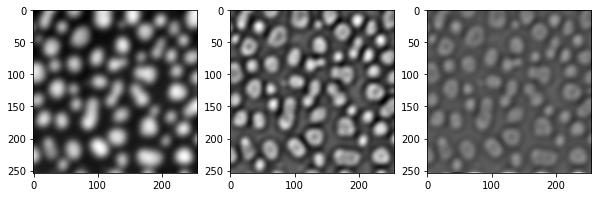

PredefinedFeatureSet.large_dog_log
generated features:  ['gaussian_blur=25.0', 'difference_of_gaussian=25.0', 'laplace_box_of_gaussian_blur=25.0']


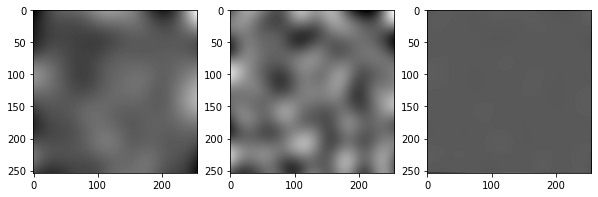

PredefinedFeatureSet.object_size_1_to_5_px
generated features:  ['original', 'gaussian_blur=1.0', 'gaussian_blur=2.0', 'gaussian_blur=3.0', 'gaussian_blur=4.0', 'gaussian_blur=5.0', 'difference_of_gaussian=1.0', 'difference_of_gaussian=2.0', 'difference_of_gaussian=3.0', 'difference_of_gaussian=4.0', 'difference_of_gaussian=5.0', 'laplace_box_of_gaussian_blur=1.0', 'laplace_box_of_gaussian_blur=2.0', 'laplace_box_of_gaussian_blur=3.0', 'laplace_box_of_gaussian_blur=4.0', 'laplace_box_of_gaussian_blur=5.0']


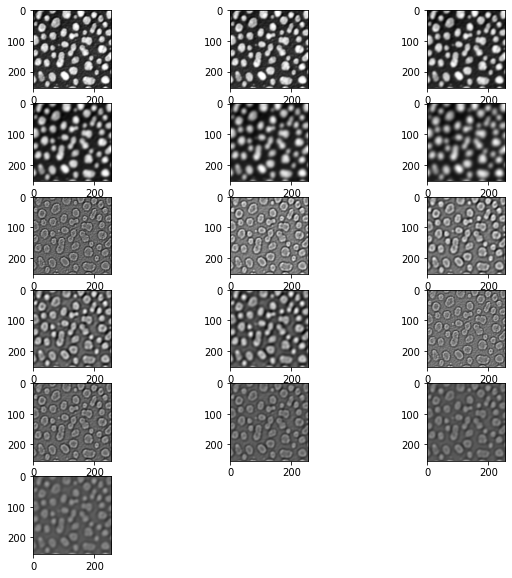

PredefinedFeatureSet.object_size_5_to_10_px
generated features:  ['gaussian_blur=5.0', 'gaussian_blur=6.0', 'gaussian_blur=7.0', 'gaussian_blur=8.0', 'gaussian_blur=9.0', 'gaussian_blur=10.0', 'difference_of_gaussian=5.0', 'difference_of_gaussian=6.0', 'difference_of_gaussian=7.0', 'difference_of_gaussian=8.0', 'difference_of_gaussian=9.0', 'difference_of_gaussian=10.0', 'laplace_box_of_gaussian_blur=5.0', 'laplace_box_of_gaussian_blur=6.0', 'laplace_box_of_gaussian_blur=7.0', 'laplace_box_of_gaussian_blur=8.0', 'laplace_box_of_gaussian_blur=9.0', 'laplace_box_of_gaussian_blur=10.0']


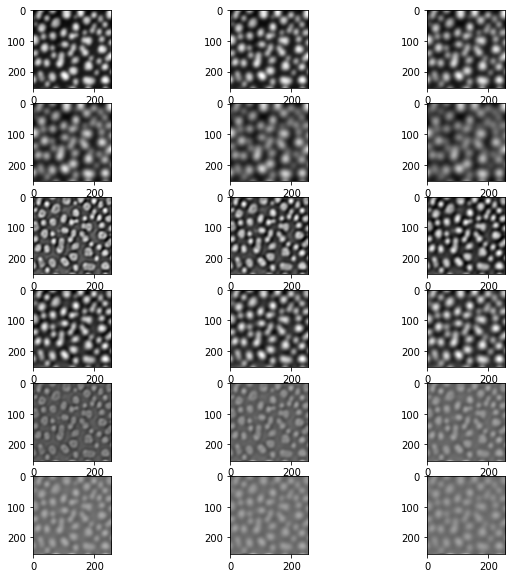

PredefinedFeatureSet.object_size_10_to_15_px
generated features:  ['gaussian_blur=10.0', 'gaussian_blur=11.0', 'gaussian_blur=12.0', 'gaussian_blur=13.0', 'gaussian_blur=14.0', 'gaussian_blur=15.0', 'difference_of_gaussian=10.0', 'difference_of_gaussian=11.0', 'difference_of_gaussian=12.0', 'difference_of_gaussian=13.0', 'difference_of_gaussian=14.0', 'difference_of_gaussian=15.0', 'laplace_box_of_gaussian_blur=10.0', 'laplace_box_of_gaussian_blur=11.0', 'laplace_box_of_gaussian_blur=12.0', 'laplace_box_of_gaussian_blur=13.0', 'laplace_box_of_gaussian_blur=14.0', 'laplace_box_of_gaussian_blur=15.0']


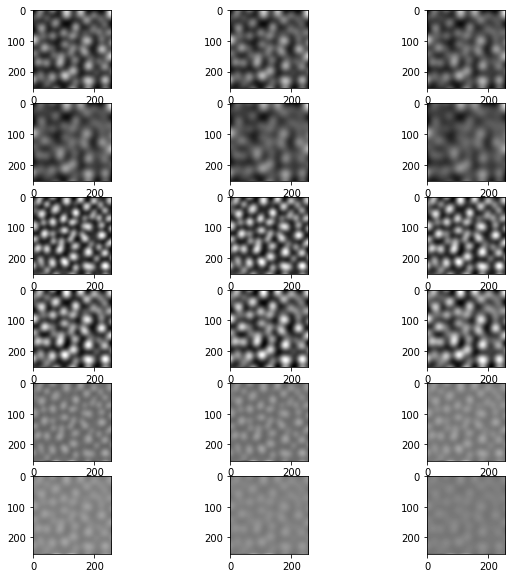

PredefinedFeatureSet.object_size_15_to_20_px
generated features:  ['gaussian_blur=15.0', 'gaussian_blur=16.0', 'gaussian_blur=17.0', 'gaussian_blur=18.0', 'gaussian_blur=19.0', 'gaussian_blur=20.0', 'difference_of_gaussian=15.0', 'difference_of_gaussian=16.0', 'difference_of_gaussian=17.0', 'difference_of_gaussian=18.0', 'difference_of_gaussian=19.0', 'difference_of_gaussian=20.0', 'laplace_box_of_gaussian_blur=15.0', 'laplace_box_of_gaussian_blur=16.0', 'laplace_box_of_gaussian_blur=17.0', 'laplace_box_of_gaussian_blur=18.0', 'laplace_box_of_gaussian_blur=19.0', 'laplace_box_of_gaussian_blur=20.0']


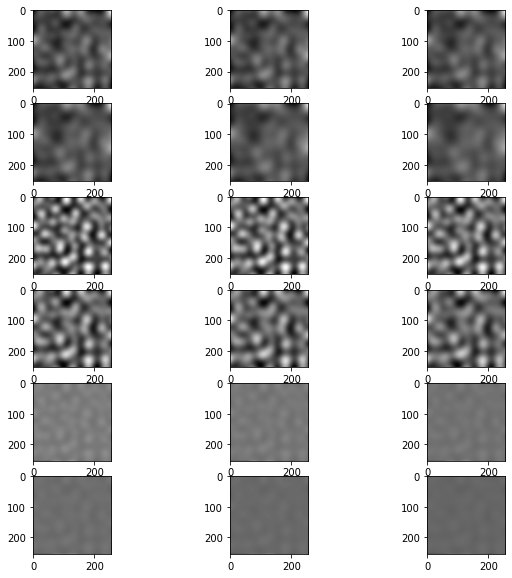

PredefinedFeatureSet.object_size_20_to_25_px
generated features:  ['gaussian_blur=20.0', 'gaussian_blur=21.0', 'gaussian_blur=22.0', 'gaussian_blur=23.0', 'gaussian_blur=24.0', 'gaussian_blur=25.0', 'difference_of_gaussian=20.0', 'difference_of_gaussian=21.0', 'difference_of_gaussian=22.0', 'difference_of_gaussian=23.0', 'difference_of_gaussian=24.0', 'difference_of_gaussian=25.0', 'laplace_box_of_gaussian_blur=20.0', 'laplace_box_of_gaussian_blur=21.0', 'laplace_box_of_gaussian_blur=22.0', 'laplace_box_of_gaussian_blur=23.0', 'laplace_box_of_gaussian_blur=24.0', 'laplace_box_of_gaussian_blur=25.0']


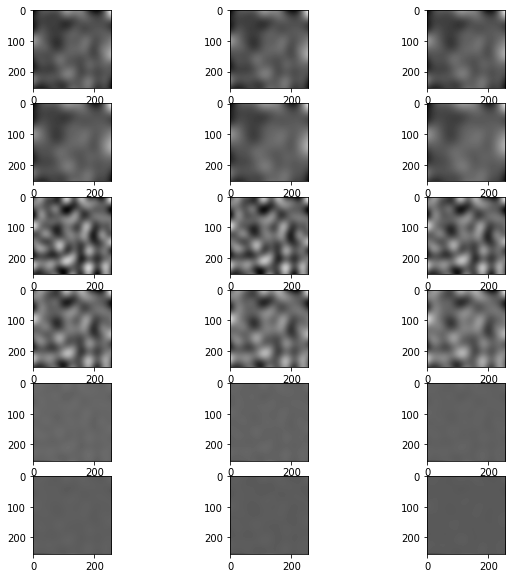

PredefinedFeatureSet.object_size_25_to_50_px
generated features:  ['gaussian_blur=25.0', 'gaussian_blur=30.0', 'gaussian_blur=35.0', 'gaussian_blur=40.0', 'gaussian_blur=45.0', 'difference_of_gaussian=25.0', 'difference_of_gaussian=30.0', 'difference_of_gaussian=35.0', 'difference_of_gaussian=40.0', 'difference_of_gaussian=45.0', 'laplace_box_of_gaussian_blur=25.0', 'laplace_box_of_gaussian_blur=30.0', 'laplace_box_of_gaussian_blur=35.0', 'laplace_box_of_gaussian_blur=40.0', 'laplace_box_of_gaussian_blur=45.0']


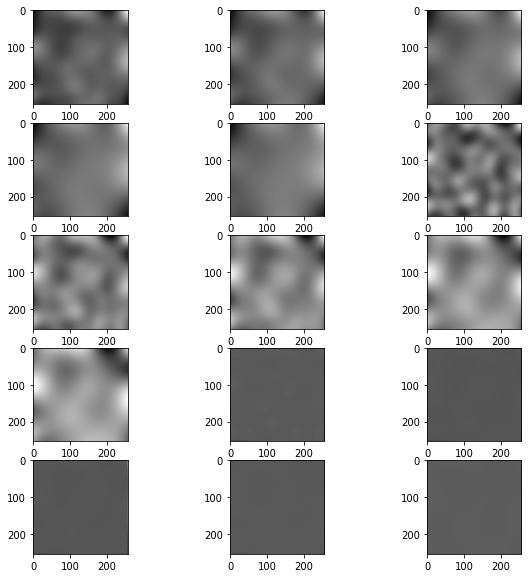

PredefinedFeatureSet.object_size_50_to_100_px
generated features:  ['gaussian_blur=50.0', 'gaussian_blur=60.0', 'gaussian_blur=70.0', 'gaussian_blur=80.0', 'gaussian_blur=90.0', 'difference_of_gaussian=50.0', 'difference_of_gaussian=60.0', 'difference_of_gaussian=70.0', 'difference_of_gaussian=80.0', 'difference_of_gaussian=90.0', 'laplace_box_of_gaussian_blur=50.0', 'laplace_box_of_gaussian_blur=60.0', 'laplace_box_of_gaussian_blur=70.0', 'laplace_box_of_gaussian_blur=80.0', 'laplace_box_of_gaussian_blur=90.0']


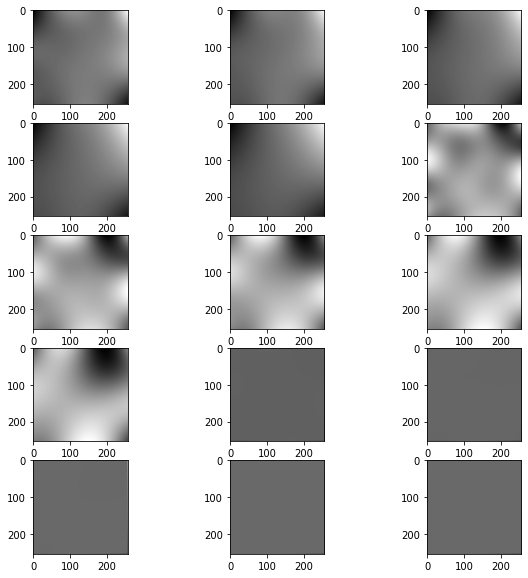

In [4]:
from oclrfc import PredefinedFeatureSet

for f in PredefinedFeatureSet:
    print(f)
    visualize(oclrfc.generate_feature_stack(image, f))

## Custom feature definitions
You can furthermore, define specific features corresponding to [clesperanto filters](https://clij.github.io/clij2-docs/reference__pyclesperanto):

generated features:  ['gaussian_blur=3.0', 'mean_box=3.0', 'top_hat_box=3.0']


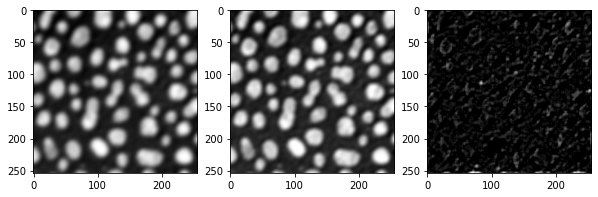

In [5]:
feature_stack = oclrfc.generate_feature_stack(image, "gaussian_blur=3 mean_box=3 top_hat_box=3")

visualize(feature_stack)

generated features:  ['maximum_box=3.0', 'difference_of_gaussian=5.0', 'sobel=0.0']


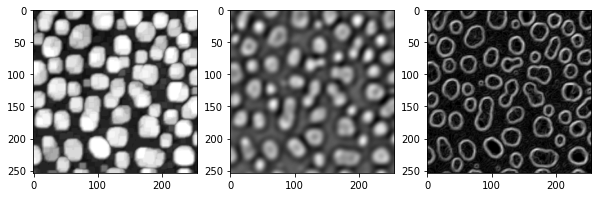

In [6]:
feature_stack = oclrfc.generate_feature_stack(image, "maximum_box=3 difference_of_gaussian=5 sobel=0")

visualize(feature_stack)

You can also vary radii / sigmas of the fetures:

generated features:  ['gaussian_blur=1.0', 'gaussian_blur=5.0', 'gaussian_blur=10.0', 'gaussian_blur=20.0']


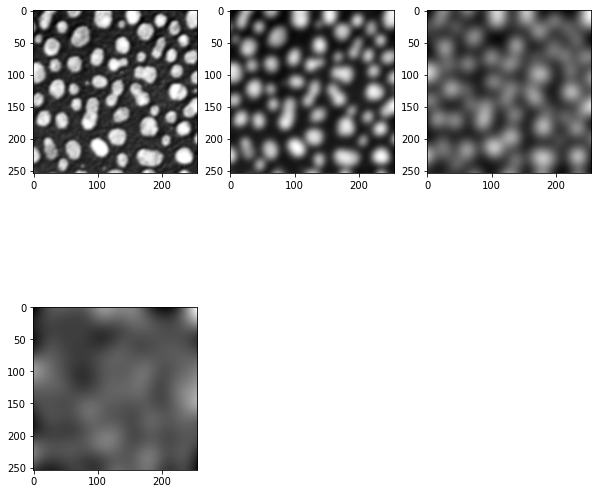

In [7]:
feature_stack = oclrfc.generate_feature_stack(image, "gaussian_blur=1 gaussian_blur=5 gaussian_blur=10 gaussian_blur=20")

visualize(feature_stack)

Furthermore, some features can be combined, for example you can compute the sobel of a Gaussian or a Laplacian of a Gaussian

generated features:  ['gaussian_blur=1.0', 'sobel_of_gaussian_blur=1.0', 'gaussian_blur=5.0', 'sobel_of_gaussian_blur=5.0', 'gaussian_blur=10.0', 'sobel_of_gaussian_blur=10.0']


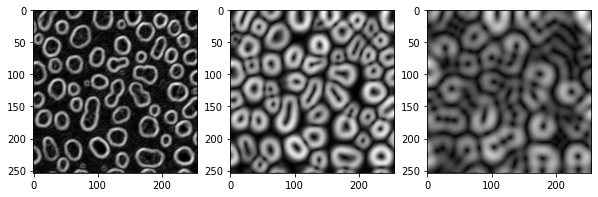

In [8]:
feature_stack = oclrfc.generate_feature_stack(image, "sobel_of_gaussian_blur=1 sobel_of_gaussian_blur=5 sobel_of_gaussian_blur=10")

visualize(feature_stack)

generated features:  ['gaussian_blur=1.0', 'laplace_box_of_gaussian_blur=1.0', 'gaussian_blur=5.0', 'laplace_box_of_gaussian_blur=5.0', 'gaussian_blur=10.0', 'laplace_box_of_gaussian_blur=10.0']


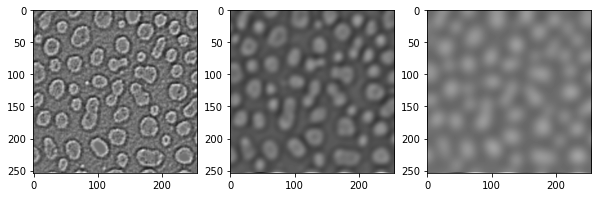

In [9]:
feature_stack = oclrfc.generate_feature_stack(image, "laplace_box_of_gaussian_blur=1 laplace_box_of_gaussian_blur=5 laplace_box_of_gaussian_blur=10")

visualize(feature_stack)